<a href="https://colab.research.google.com/github/Lilhxr/ADBS_2022/blob/main/Visulazation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --no-deps albumentations==1.0.0 # image argumentation
!pip install timm # pytorch image models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 4.6 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 8.2 MB/s 


In [3]:
%cd "/content/drive/MyDrive/dissertation_main/leaf_detect-main/vit-explainer2"

/content/drive/MyDrive/dissertation_main/leaf_detect-main/vit-explainer2


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [6]:
def read_data_from_json(json_path):
    with open(json_path, 'r', encoding='utf-8') as fp:
        data = json.load(fp)
        return data

In [40]:
data1 = read_data_from_json('./learning_data/resnet50_log_cross.json')
data2 = read_data_from_json('./learning_data/resnet101_log_cross.json')
data3 = read_data_from_json('./learning_data/efficientnet_b0_log_cross.json')
model1_name = 'resnet50'
model2_name = 'resnet101'
model3_name = 'efficientnet_b0'
title = 'CNNs With Label-Smoothing Loss'

In [19]:
data1 = read_data_from_json('./learning_data/resnet50_log_focal.json')
data2 = read_data_from_json('./learning_data/resnet101_log_focal.json')
data3 = read_data_from_json('./learning_data/efficientnet_b0_log_focal.json')
model1_name = 'resnet50'
model2_name = 'resnet101'
model3_name = 'efficientnet_b0'
title = 'CNNs With Focal Loss'

In [22]:
data1 = read_data_from_json('./learning_data/resnet50_log_bitemp.json')
data2 = read_data_from_json('./learning_data/resnet101_log_bitemp.json')
data3 = read_data_from_json('./learning_data/efficientnet_b0_log_bitemp.json')
model1_name = 'resnet50'
model2_name = 'resnet101'
model3_name = 'efficientnet_b0'
title = 'CNNs With Bi-Tempered Logistic Loss'

In [25]:
data1 = read_data_from_json('./learning_data/resnet50_log_sym.json')
data2 = read_data_from_json('./learning_data/resnet101_log_sym.json')
data3 = read_data_from_json('./learning_data/efficientnet_b0_log_sym.json')
model1_name = 'resnet50'
model2_name = 'resnet101'
model3_name = 'efficientnet_b0'
title = 'CNNs With Symmetric Loss'

In [28]:
data1 = read_data_from_json('./learning_data/vit_small_patch16_224_log_cross.json')
data2 = read_data_from_json('./learning_data/deit_small_patch16_224_log_cross.json')
data3 = read_data_from_json('./learning_data/swin_small_patch4_window7_224_log_cross.json')
model1_name = 'vit_small'
model2_name = 'deit_small'
model3_name = 'swin_small'
title = 'ViTs With Label-Smoothing Loss'

In [31]:
data1 = read_data_from_json('./learning_data/vit_small_patch16_224_log_focal.json')
data2 = read_data_from_json('./learning_data/deit_small_patch16_224_log_focal.json')
data3 = read_data_from_json('./learning_data/swin_small_patch4_window7_224_log_focal.json')
model1_name = 'vit_small'
model2_name = 'deit_small'
model3_name = 'swin_small'
title = 'ViTs With Focal Loss'

In [34]:
data1 = read_data_from_json('./learning_data/vit_small_patch16_224_log_bitemp.json')
data2 = read_data_from_json('./learning_data/deit_small_patch16_224_log_bitemp.json')
data3 = read_data_from_json('./learning_data/swin_small_patch4_window7_224_log_bitemp.json')
model1_name = 'vit_small'
model2_name = 'deit_small'
model3_name = 'swin_small'
title = 'ViTs With Bi-Tempered Logistic Loss'

In [37]:
data1 = read_data_from_json('./learning_data/vit_small_patch16_224_log_sym.json')
data2 = read_data_from_json('./learning_data/deit_small_patch16_224_log_sym.json')
data3 = read_data_from_json('./learning_data/swin_small_patch4_window7_224_log_sym.json')
model1_name = 'vit_small'
model2_name = 'deit_small'
model3_name = 'swin_small'
title = 'ViTs With Symmetric Loss'

In [41]:
def plot_accuracy_curve(data1, data2, data3, model1_name, model2_name, model3_name, title):
    dataset = [(data1, model1_name, 's', ['orangered', 'green']), (data2, model2_name, '^', ['orange', 'darkcyan']), (data3, model3_name, 'o', ['royalblue', 'deeppink'])]
    dataset2 = []
    for data, model_name, marker, colors in dataset:
       train_acc = np.array(data['train_acc_mean'])
       val_acc = np.array(data['val_acc_mean'])
       train_std = np.array(data['train_acc_std'])
       val_std = np.array(data['val_acc_std'])
       dataset2.append((train_acc, val_acc, train_std, val_std, model_name, marker, colors))
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
    ax.yaxis.set_ticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax.set_xlim(0, 19)
    ax.set_ylim(0.0, 1.0)
    ax.grid()
    for train_acc, val_acc, train_std, val_std, model_name, marker, colors in dataset2:
        plt.plot(train_acc, linestyle='-', marker=marker, label=model_name+' training accuracy')     
        plt.plot(val_acc, linestyle='-', marker=marker, label=model_name+' validation accuracy')
       
    ax.legend(loc='lower right')
    ax.set_xlabel('Epoch number', fontsize=18)
    ax.set_ylabel('Accuracy', fontsize=18)
    ax.set_title(title, fontsize=20)
    plt.savefig('./ViTs-Sym.png')
    plt.show()

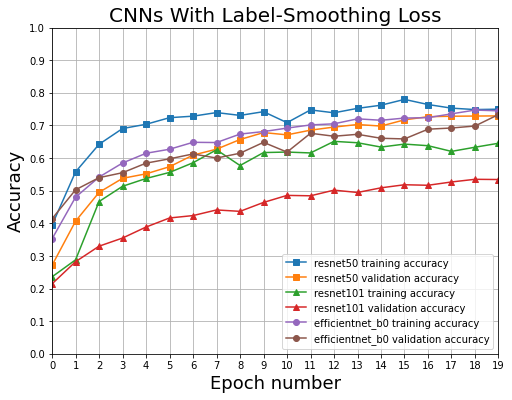

In [42]:
plot_accuracy_curve(data1, data2, data3, model1_name, model2_name, model3_name, title)